# Análisis Exploratorio de Datos de Movimiento Corporal

### Dataset de Landmarks Extraídos

### Librerías Requeridas

In [73]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
motion_data = pd.read_csv("motion_data.csv")
print(f"Dimensiones del dataset: {motion_data.shape}")
print(f"\nVista previa de los datos:")
motion_data.head()

Dimensiones del dataset: (981, 136)

Vista previa de los datos:


,frame_number,clip_name,coord_x_0,coord_y_0,coord_z_0,confidence_0,coord_x_1,coord_y_1,coord_z_1,confidence_1,...,coord_x_31,coord_y_31,coord_z_31,confidence_31,coord_x_32,coord_y_32,coord_z_32,confidence_32,movement_type,speed
0,0,caminar-adelante_lento.mp4,0.538061,0.168150,-1.192045,0.999984,0.554350,0.160888,-1.160717,0.999953,...,0.538819,0.741005,-0.075169,0.949961,0.462979,0.739263,-0.064395,0.930977,caminar-adelante,lento
1,1,caminar-adelante_lento.mp4,0.538366,0.167670,-1.130636,0.999984,0.554828,0.160035,-1.097094,0.999955,...,0.537900,0.742360,-0.061989,0.948275,0.463695,0.739268,-0.065465,0.928884,caminar-adelante,lento
2,2,caminar-adelante_lento.mp4,0.538623,0.167328,-1.128241,0.999985,0.555223,0.159433,-1.094226,0.999957,...,0.537561,0.743669,-0.064732,0.945555,0.463971,0.739265,-0.068536,0.924955,caminar-adelante,lento
3,3,caminar-adelante_lento.mp4,0.538687,0.166869,-1.114471,0.999985,0.555386,0.158556,-1.081159,0.999956,...,0.537032,0.744190,-0.082844,0.939933,0.463974,0.739281,-0.081997,0.917400,caminar-adelante,lento
4,4,caminar-adelante_lento.mp4,0.538883,0.166078,-1.106468,0.999985,0.555566,0.157179,-1.074263,0.999957,...,0.536741,0.744122,-0.115281,0.937023,0.462320,0.735856,-0.094485,0.913341,caminar-adelante,lento


### Mapeo de Landmarks a Nombres Descriptivos

In [76]:
# Diccionario completo de landmarks de MediaPipe Pose
LANDMARK_NAMES = {
    0: 'nose',
    1: 'left_eye_inner',
    2: 'left_eye',
    3: 'left_eye_outer',
    4: 'right_eye_inner',
    5: 'right_eye',
    6: 'right_eye_outer',
    7: 'left_ear',
    8: 'right_ear',
    9: 'mouth_left',
    10: 'mouth_right',
    11: 'left_shoulder',
    12: 'right_shoulder',
    13: 'left_elbow',
    14: 'right_elbow',
    15: 'left_wrist',
    16: 'right_wrist',
    17: 'left_pinky',
    18: 'right_pinky',
    19: 'left_index',
    20: 'right_index',
    21: 'left_thumb',
    22: 'right_thumb',
    23: 'left_hip',
    24: 'right_hip',
    25: 'left_knee',
    26: 'right_knee',
    27: 'left_ankle',
    28: 'right_ankle',
    29: 'left_heel',
    30: 'right_heel',
    31: 'left_foot_index',
    32: 'right_foot_index'
}

# Landmarks críticos: Caderas, Rodillas, Tobillos, Muñecas, Hombros, Cabeza
critical_landmarks_dict = {
    0: 'nose',              # Cabeza
    11: 'left_shoulder',    # Hombros
    12: 'right_shoulder',
    15: 'left_wrist',       # Muñecas
    16: 'right_wrist',
    23: 'left_hip',         # Caderas
    24: 'right_hip',
    25: 'left_knee',        # Rodillas
    26: 'right_knee',
    27: 'left_ankle',       # Tobillos
    28: 'right_ankle'
}

# Crear columnas adicionales con nombres descriptivos para landmarks críticos
for landmark_idx, descriptive_name in critical_landmarks_dict.items():
    motion_data[f'{descriptive_name}_x'] = motion_data[f'coord_x_{landmark_idx}']
    motion_data[f'{descriptive_name}_y'] = motion_data[f'coord_y_{landmark_idx}']
    motion_data[f'{descriptive_name}_z'] = motion_data[f'coord_z_{landmark_idx}']
    motion_data[f'{descriptive_name}_confidence'] = motion_data[f'confidence_{landmark_idx}']

print("✓ Columnas con nombres descriptivos agregadas")
print(f"\nTotal de landmarks críticos: {len(critical_landmarks_dict)}")
print("\nLandmarks incluidos:")
for idx, name in critical_landmarks_dict.items():
    print(f"  - {name} (landmark {idx})")

print("\nEjemplo de datos con nombres descriptivos:")
display_cols = ['nose_y', 'left_shoulder_y', 'left_wrist_y', 'left_hip_y', 'left_knee_y', 'left_ankle_y']
print(motion_data[display_cols].head())

✓ Columnas con nombres descriptivos agregadas

Total de landmarks críticos: 11

Landmarks incluidos:
  - nose (landmark 0)
  - left_shoulder (landmark 11)
  - right_shoulder (landmark 12)
  - left_wrist (landmark 15)
  - right_wrist (landmark 16)
  - left_hip (landmark 23)
  - right_hip (landmark 24)
  - left_knee (landmark 25)
  - right_knee (landmark 26)
  - left_ankle (landmark 27)
  - right_ankle (landmark 28)

Ejemplo de datos con nombres descriptivos:
     nose_y  left_shoulder_y  left_wrist_y  left_hip_y  left_knee_y  \
0  0.168150         0.247071      0.434179    0.408793     0.557654   
1  0.167670         0.247291      0.434353    0.409106     0.557837   
2  0.167328         0.247417      0.434467    0.409119     0.557911   
3  0.166869         0.247480      0.434472    0.409080     0.557934   
4  0.166078         0.247475      0.434358    0.408020     0.557266   

   left_ankle_y  
0      0.695267  
1      0.694563  
2      0.694515  
3      0.694522  
4      0.694559  


## 1. Descripción General de los Datos

In [77]:
# Resumen del contenido del dataset
print("="*60)
print("DESCRIPCIÓN GENERAL")
print("="*60)
print(f"\nCantidad de frames: {len(motion_data)}")
print(f"Cantidad de columnas: {len(motion_data.columns)}")
print(f"\nMuestra de columnas:")
print(motion_data.columns.tolist()[:10], "... (primeras 10)")

print("\n" + "="*60)
print("TIPOS DE MOVIMIENTO Y VELOCIDADES")
print("="*60)
print("\nMovimientos únicos:")
print(motion_data['movement_type'].value_counts())
print("\nVelocidades registradas:")
print(motion_data['speed'].value_counts())

print("\n" + "="*60)
print("DATOS FALTANTES")
print("="*60)
print(motion_data.isnull().sum().sum(), "valores faltantes en total")

DESCRIPCIÓN GENERAL

Cantidad de frames: 981
Cantidad de columnas: 180

Muestra de columnas:
['frame_number', 'clip_name', 'coord_x_0', 'coord_y_0', 'coord_z_0', 'confidence_0', 'coord_x_1', 'coord_y_1', 'coord_z_1', 'confidence_1'] ... (primeras 10)

TIPOS DE MOVIMIENTO Y VELOCIDADES

Movimientos únicos:
movement_type
caminar-atras       242
girar               223
caminar-adelante    200
sentarse            162
levantarse          154
Name: count, dtype: int64

Velocidades registradas:
speed
lento     631
rapido    350
Name: count, dtype: int64

DATOS FALTANTES
0 valores faltantes en total


## 2. Análisis de Distribución de Datos

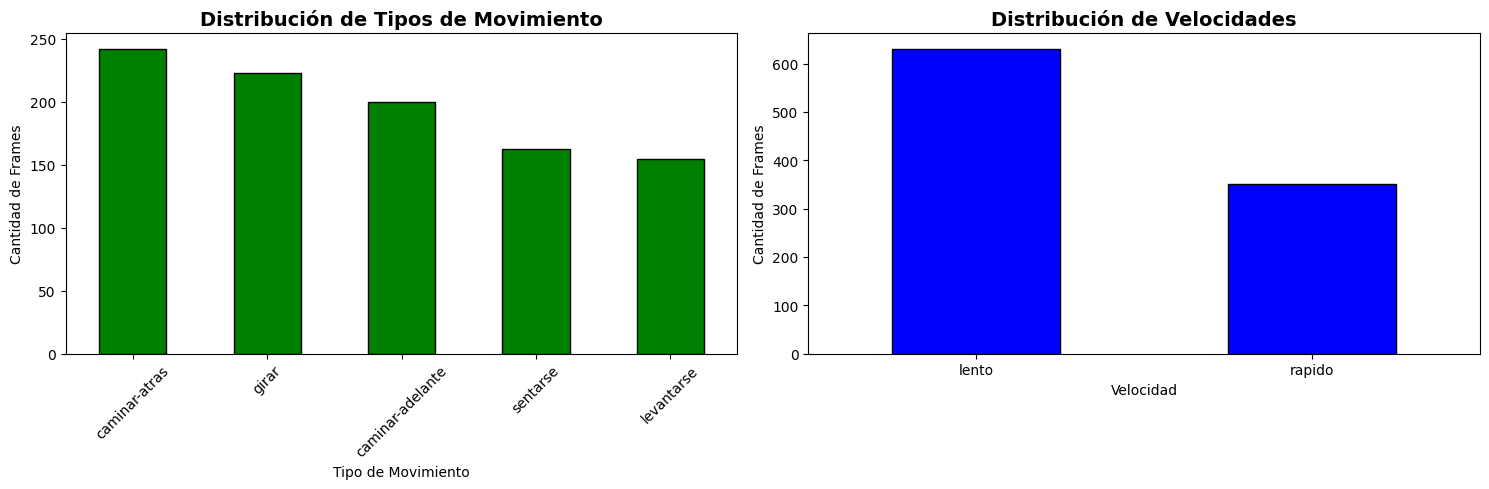


Frames por clip de video:
clip_name
caminar-atras_lento.mp4        164
girar_lento.mp4                152
caminar-adelante_lento.mp4     111
levantarse_lento.mp4           110
sentarse_lento.mp4              94
caminar-adelante_rapido.mp4     89
caminar-atras_rapido.mp4        78
girar_rapido.mp4                71
sentarse_rapido.mp4             68
levantarse_rapido.mp4           44
Name: frame_number, dtype: int64


In [78]:
# Visualización de distribuciones
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribución de tipos de movimiento
motion_data['movement_type'].value_counts().plot(kind='bar', ax=axes[0], color='green', edgecolor='black')
axes[0].set_title('Distribución de Tipos de Movimiento', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipo de Movimiento')
axes[0].set_ylabel('Cantidad de Frames')
axes[0].tick_params(axis='x', rotation=45)

# Distribución de velocidades
motion_data['speed'].value_counts().plot(kind='bar', ax=axes[1], color='blue', edgecolor='black')
axes[1].set_title('Distribución de Velocidades', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Velocidad')
axes[1].set_ylabel('Cantidad de Frames')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Conteo de frames por clip
print("\nFrames por clip de video:")
print(motion_data.groupby('clip_name')['frame_number'].count().sort_values(ascending=False))

## 3. Landmarks Principales para Análisis

Los landmarks críticos para el análisis de movimiento corporal incluyen:
- **23, 24**: Caderas (izquierda, derecha)
- **25, 26**: Rodillas (izquierda, derecha)  
- **27, 28**: Tobillos (izquierda, derecha)
- **11, 12**: Hombros (izquierda, derecha)

In [79]:
# Mapeo de landmarks relevantes
critical_landmarks = {
    'Cadera Izq': 23,
    'Cadera Der': 24,
    'Rodilla Izq': 25,
    'Rodilla Der': 26,
    'Tobillo Izq': 27,
    'Tobillo Der': 28
}

# Análisis estadístico de coordenadas Y
print("="*60)
print("ESTADÍSTICAS DE LANDMARKS PRINCIPALES (Coordenada Y)")
print("="*60)

for landmark_name, landmark_idx in critical_landmarks.items():
    y_column = f'coord_y_{landmark_idx}'
    print(f"\n{landmark_name} (landmark {landmark_idx}):")
    print(f"  Promedio: {motion_data[y_column].mean():.4f}")
    print(f"  Desviación Estándar: {motion_data[y_column].std():.4f}")
    print(f"  Mínimo: {motion_data[y_column].min():.4f}")
    print(f"  Máximo: {motion_data[y_column].max():.4f}")

ESTADÍSTICAS DE LANDMARKS PRINCIPALES (Coordenada Y)

Cadera Izq (landmark 23):
  Promedio: 0.4399
  Desviación Estándar: 0.0825
  Mínimo: 0.1067
  Máximo: 0.6162

Cadera Der (landmark 24):
  Promedio: 0.4407
  Desviación Estándar: 0.0819
  Mínimo: 0.1180
  Máximo: 0.6149

Rodilla Izq (landmark 25):
  Promedio: 0.5957
  Desviación Estándar: 0.0731
  Mínimo: 0.1992
  Máximo: 0.7474

Rodilla Der (landmark 26):
  Promedio: 0.5971
  Desviación Estándar: 0.0725
  Mínimo: 0.2073
  Máximo: 0.7528

Tobillo Izq (landmark 27):
  Promedio: 0.7701
  Desviación Estándar: 0.1119
  Mínimo: 0.1313
  Máximo: 1.0417

Tobillo Der (landmark 28):
  Promedio: 0.7678
  Desviación Estándar: 0.1151
  Mínimo: 0.0580
  Máximo: 1.0056


## 4. Visualización de Trayectorias por Tipo de Movimiento

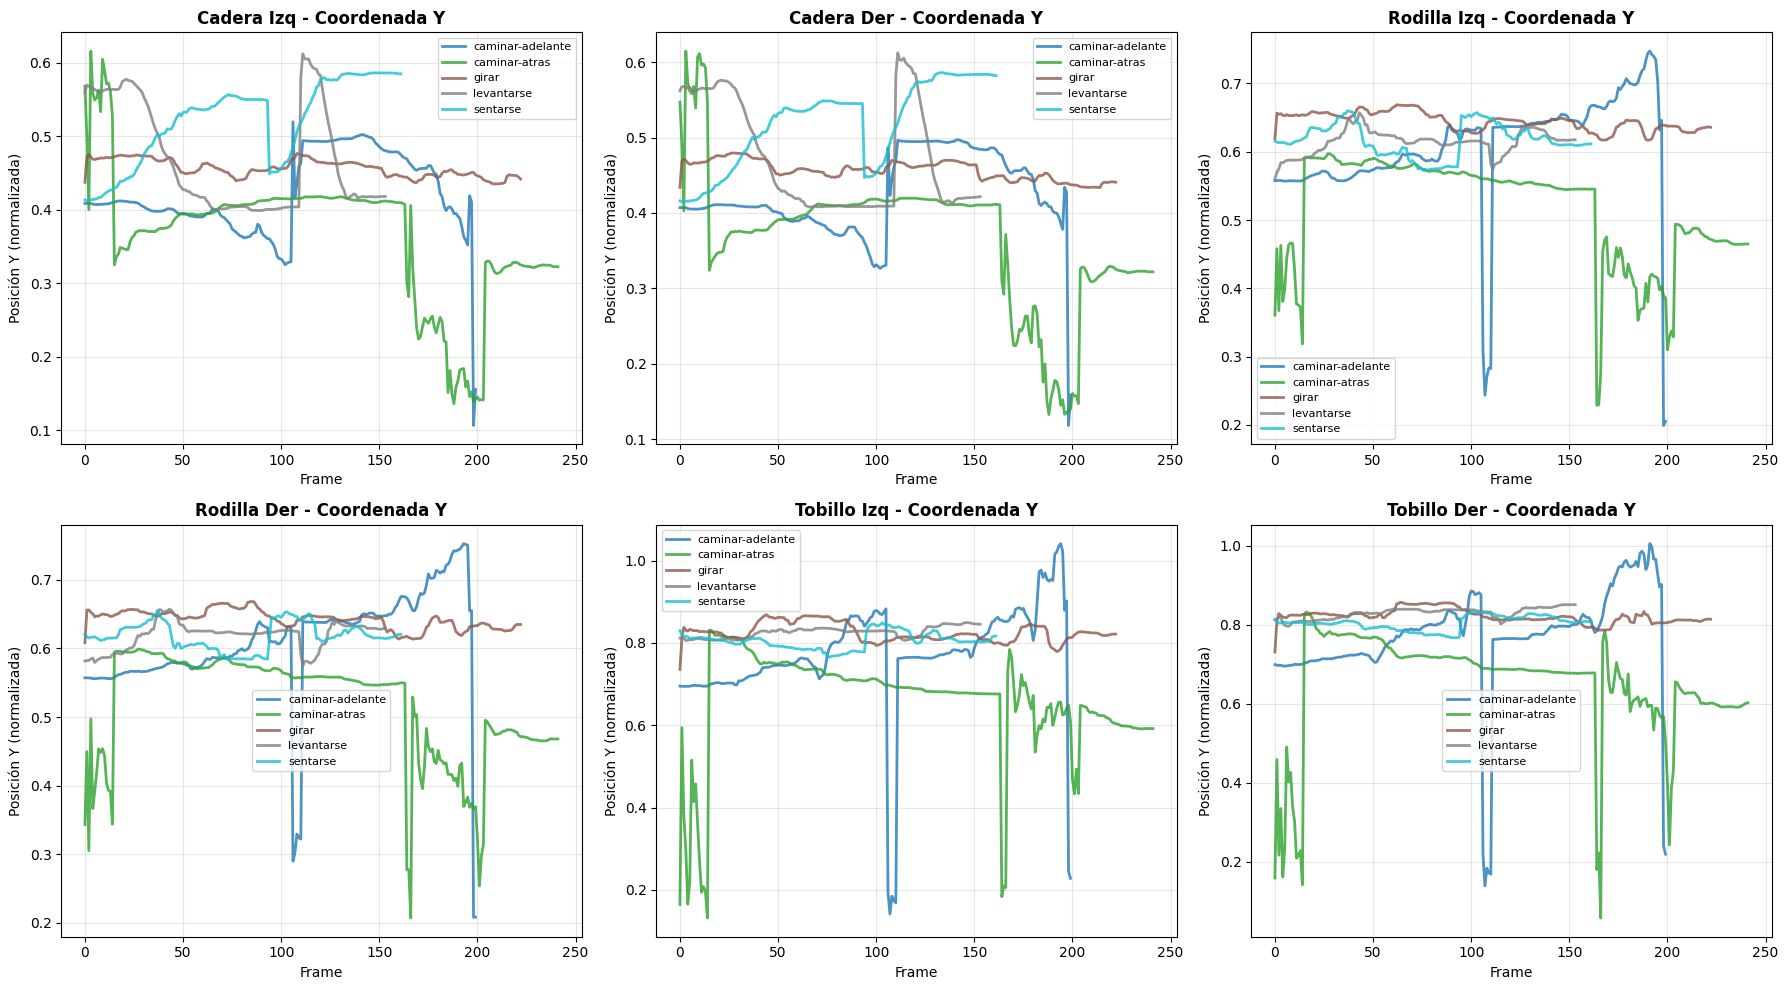

In [80]:
# Graficar trayectorias de landmarks principales
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

color_palette = plt.cm.tab10(np.linspace(0, 1, len(motion_data['movement_type'].unique())))

for plot_idx, (landmark_name, landmark_num) in enumerate(critical_landmarks.items()):
    for movement_idx, movement in enumerate(motion_data['movement_type'].unique()):
        filtered_data = motion_data[motion_data['movement_type'] == movement].reset_index(drop=True)
        axes[plot_idx].plot(filtered_data[f'coord_y_{landmark_num}'], 
                      label=movement, 
                      alpha=0.8,
                      linewidth=2,
                      color=color_palette[movement_idx])
    
    axes[plot_idx].set_title(f'{landmark_name} - Coordenada Y', fontsize=12, fontweight='bold')
    axes[plot_idx].set_xlabel('Frame')
    axes[plot_idx].set_ylabel('Posición Y (normalizada)')
    axes[plot_idx].legend(fontsize=8)
    axes[plot_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Extracción de Características Dinámicas

Calcularemos características clave del movimiento:
- **Velocidad**: Cambio en posición entre frames consecutivos
- **Aceleración**: Variación de la velocidad
- **Distancia total**: Desplazamiento acumulado

In [81]:
# Función para generar características dinámicas
def compute_motion_characteristics(dataframe, landmark_num):
    """Genera velocidad y aceleración para un landmark específico"""
    # Componentes de velocidad
    dataframe[f'velocity_x_{landmark_num}'] = dataframe[f'coord_x_{landmark_num}'].diff()
    dataframe[f'velocity_y_{landmark_num}'] = dataframe[f'coord_y_{landmark_num}'].diff()
    
    # Magnitud de velocidad
    dataframe[f'velocity_magnitude_{landmark_num}'] = np.sqrt(
        dataframe[f'velocity_x_{landmark_num}']**2 + dataframe[f'velocity_y_{landmark_num}']**2
    )
    
    # Aceleración
    dataframe[f'acceleration_{landmark_num}'] = dataframe[f'velocity_magnitude_{landmark_num}'].diff()
    
    return dataframe

# Aplicar cálculos a TODOS los landmarks críticos
print("Generando características de movimiento para todos los landmarks críticos...")

for landmark_name, landmark_idx in critical_landmarks.items():
    motion_data = compute_motion_characteristics(motion_data, landmark_idx)
    print(f"  ✓ {landmark_name} (landmark {landmark_idx})")

print("\n✓ Características generadas:")
print("  - Velocidad en X e Y (velocity_x, velocity_y)")
print("  - Magnitud de velocidad (velocity_magnitude)")
print("  - Aceleración (acceleration)")
print(f"\nTotal de columnas: {len(motion_data.columns)}")

Generando características de movimiento para todos los landmarks críticos...
  ✓ Cadera Izq (landmark 23)
  ✓ Cadera Der (landmark 24)
  ✓ Rodilla Izq (landmark 25)
  ✓ Rodilla Der (landmark 26)
  ✓ Tobillo Izq (landmark 27)
  ✓ Tobillo Der (landmark 28)

✓ Características generadas:
  - Velocidad en X e Y (velocity_x, velocity_y)
  - Magnitud de velocidad (velocity_magnitude)
  - Aceleración (acceleration)

Total de columnas: 204


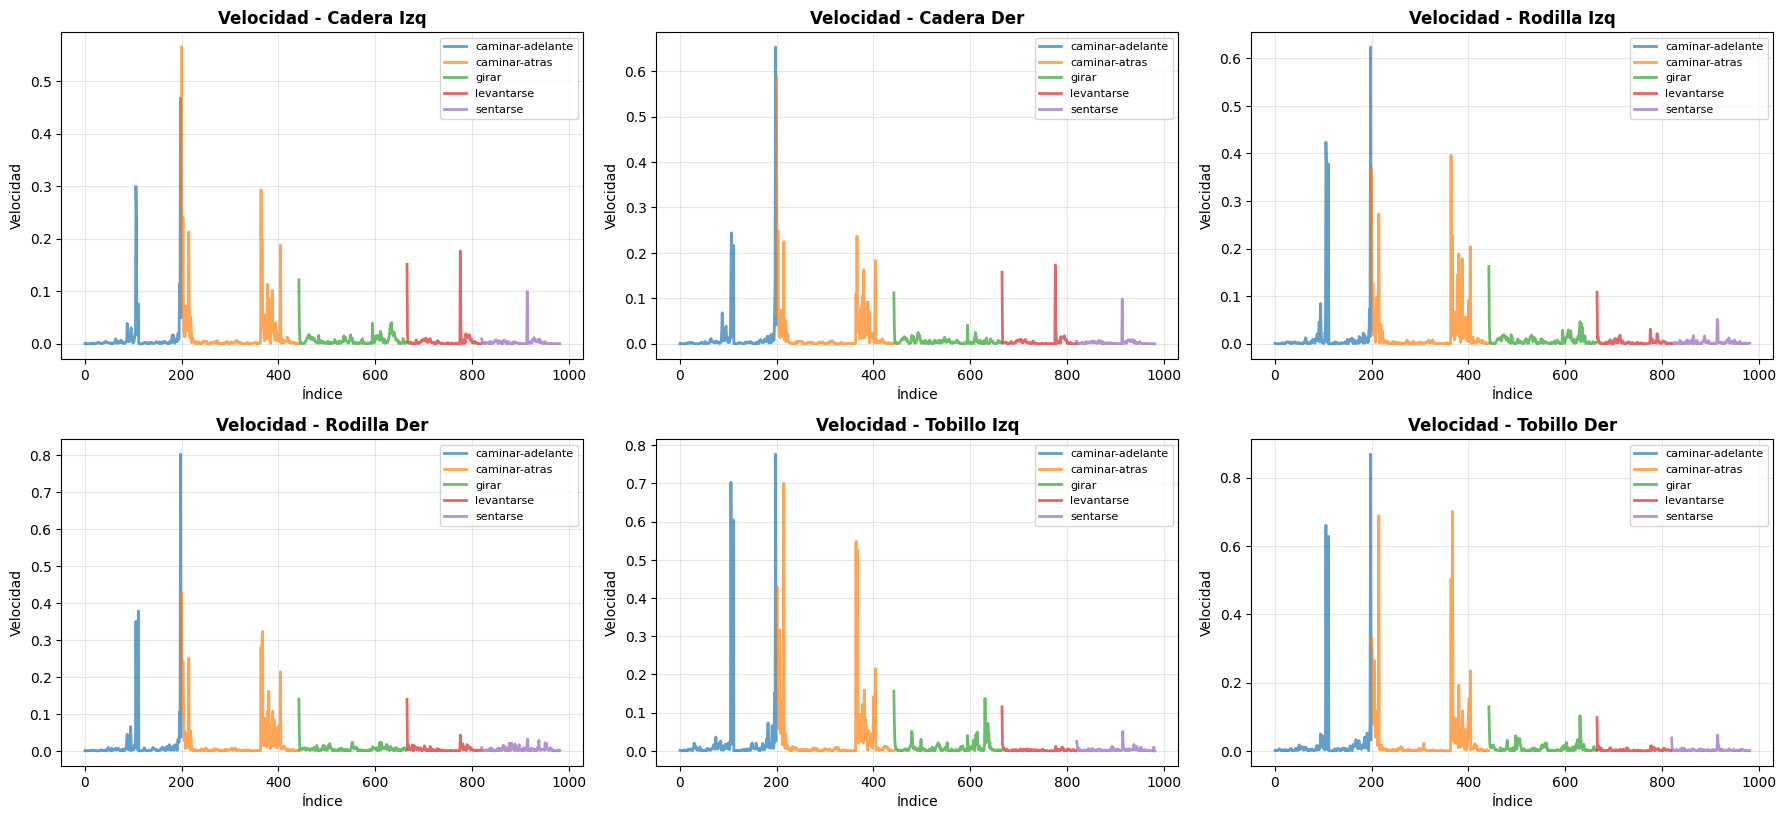

In [82]:
# Gráficas de velocidad para TODOS los landmarks críticos
# Crear una cuadrícula suficientemente grande para todos
num_landmarks = len(critical_landmarks)
num_rows = 4  # 4 filas
num_cols = 3  # 3 columnas (total: 12 espacios para 11 landmarks)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 16))
axes = axes.flatten()

for idx, (landmark_name, landmark_num) in enumerate(critical_landmarks.items()):
    for movement in motion_data['movement_type'].unique():
        subset = motion_data[motion_data['movement_type'] == movement]
        axes[idx].plot(subset.index, subset[f'velocity_magnitude_{landmark_num}'], 
                      label=movement, alpha=0.7, linewidth=2)
    
    axes[idx].set_title(f'Velocidad - {landmark_name}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Índice', fontsize=10)
    axes[idx].set_ylabel('Velocidad', fontsize=10)
    axes[idx].legend(fontsize=8, loc='best')
    axes[idx].grid(True, alpha=0.3)

# Ocultar el último subplot si no se usa (tenemos 11 landmarks, sobra 1 espacio)
if num_landmarks < len(axes):
    for idx in range(num_landmarks, len(axes)):
        axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## 6. Análisis Comparativo: Velocidades Lentas vs Rápidas

ANÁLISIS COMPARATIVO: LENTO vs RÁPIDO

Velocidad de Cadera Derecha (velocity_magnitude_24):
        count      mean       std       min       25%       50%       75%  \
speed                                                                       
lento   630.0  0.007280  0.031138  0.000004  0.000772  0.002037  0.004577   
rapido  350.0  0.012952  0.044291  0.000006  0.000977  0.003099  0.008198   

             max  
speed             
lento   0.588156  
rapido  0.652857  


Velocidad de Tobillo Derecho (velocity_magnitude_28):
        count      mean       std       min       25%       50%       75%  \
speed                                                                       
lento   630.0  0.010154  0.046716  0.000015  0.000794  0.002063  0.004967   
rapido  350.0  0.021179  0.078185  0.000033  0.001342  0.003918  0.013134   

             max  
speed             
lento   0.688503  
rapido  0.868686  


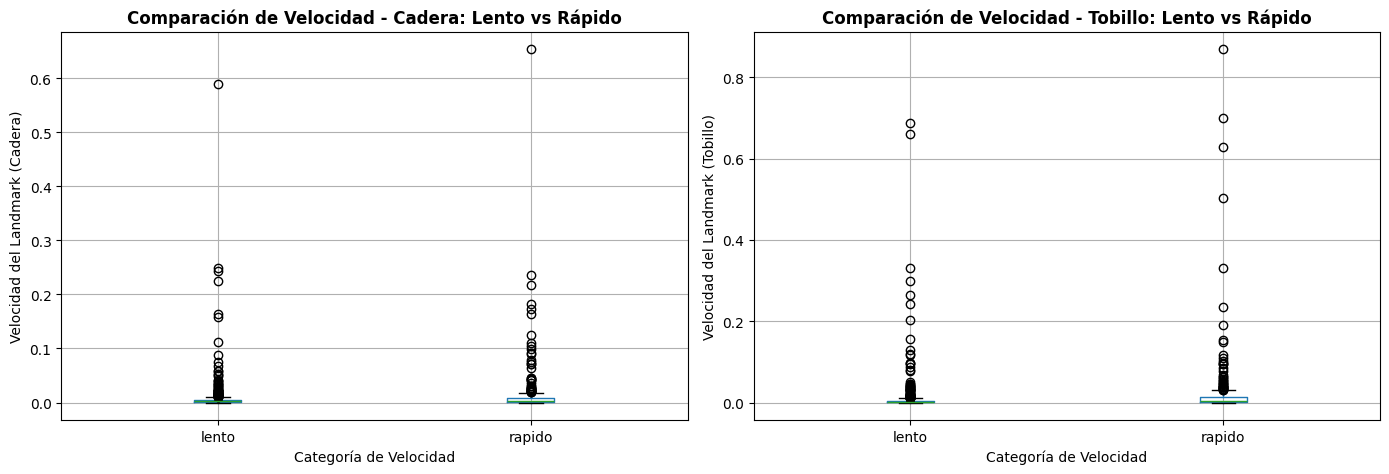

In [83]:
# Comparación de velocidades lentas vs rápidas
print("="*60)
print("ANÁLISIS COMPARATIVO: LENTO vs RÁPIDO")
print("="*60)

# Estadísticas agrupadas por velocidad
print("\nVelocidad de Cadera Derecha (velocity_magnitude_24):")
print(motion_data.groupby('speed')['velocity_magnitude_24'].describe())

print("\n" + "="*60)
print("\nVelocidad de Tobillo Derecho (velocity_magnitude_28):")
print(motion_data.groupby('speed')['velocity_magnitude_28'].describe())

# Gráficas de caja comparativas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot para cadera
motion_data.boxplot(column='velocity_magnitude_24', by='speed', ax=axes[0])
axes[0].set_title('Comparación de Velocidad - Cadera: Lento vs Rápido', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Categoría de Velocidad')
axes[0].set_ylabel('Velocidad del Landmark (Cadera)')
axes[0].get_figure().suptitle('')

# Boxplot para tobillo
motion_data.boxplot(column='velocity_magnitude_28', by='speed', ax=axes[1])
axes[1].set_title('Comparación de Velocidad - Tobillo: Lento vs Rápido', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Categoría de Velocidad')
axes[1].set_ylabel('Velocidad del Landmark (Tobillo)')
axes[1].get_figure().suptitle('')

plt.tight_layout()
plt.show()

## 7. Matriz de Correlación entre Landmarks

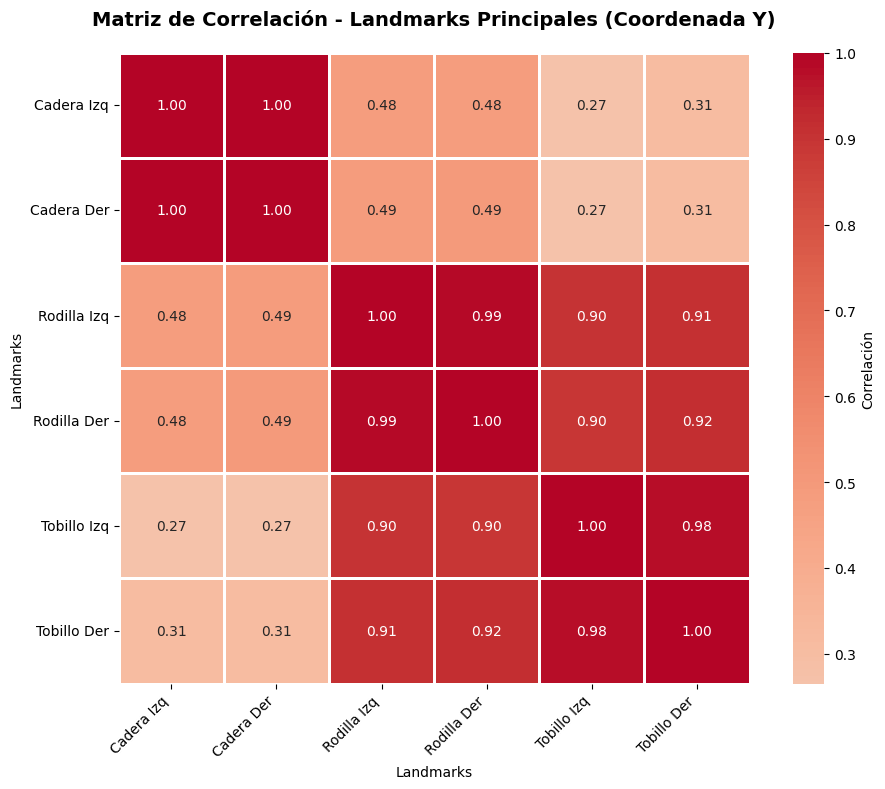

In [84]:
# Seleccionar coordenadas Y de landmarks principales
y_coordinates = [f'coord_y_{idx}' for idx in critical_landmarks.values()]
correlation_matrix = motion_data[y_coordinates].corr()

# Generar heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': 'Correlación'})

plt.title('Matriz de Correlación - Landmarks Principales (Coordenada Y)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Landmarks')
plt.ylabel('Landmarks')

# Etiquetas personalizadas
label_list = [name for name in critical_landmarks.keys()]
plt.xticks(np.arange(len(label_list)) + 0.5, label_list, rotation=45, ha='right')
plt.yticks(np.arange(len(label_list)) + 0.5, label_list, rotation=0)

plt.tight_layout()
plt.show()

## 8. Evaluación de Confianza de Landmarks

EVALUACIÓN DE CONFIANZA DE LANDMARKS

              Promedio    Mínimo    Máximo  Desv. Estándar
Cadera Izq   0.998115  0.978898  0.999669        0.002764
Cadera Der   0.997972  0.980086  0.999455        0.002583
Rodilla Izq  0.871178  0.357224  0.969753        0.113346
Rodilla Der  0.847283  0.253996  0.961425        0.137906
Tobillo Izq  0.854431  0.193810  0.963942        0.116682
Tobillo Der  0.803930  0.231385  0.941726        0.125948


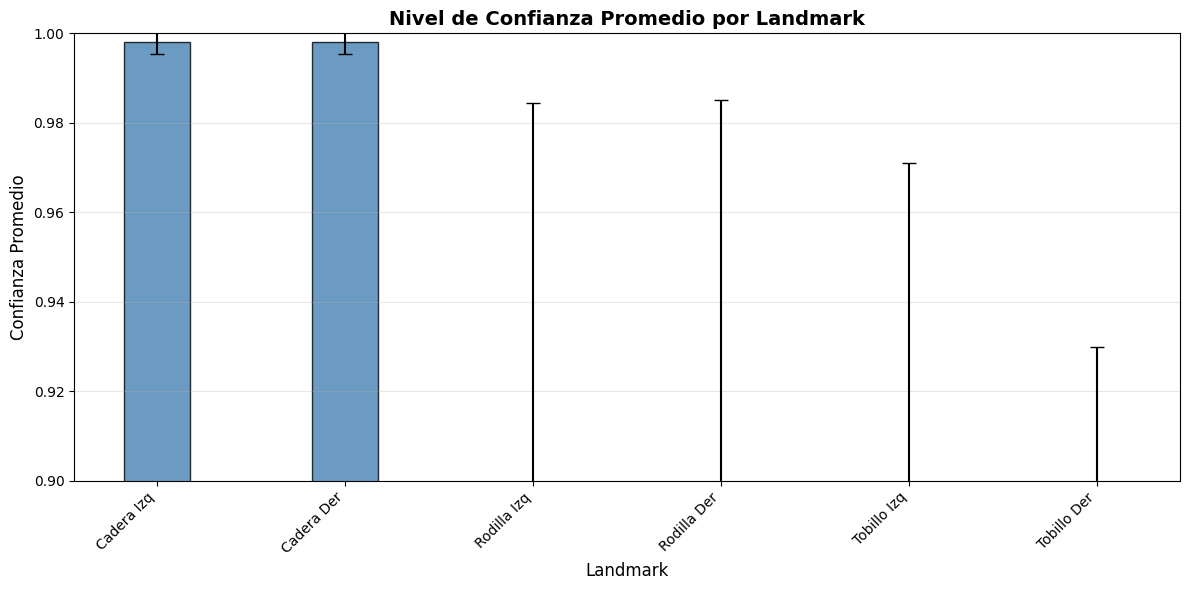

In [85]:
# Análisis de confianza (visibility/confidence) de landmarks
print("="*60)
print("EVALUACIÓN DE CONFIANZA DE LANDMARKS")
print("="*60)

confidence_summary = {}
for landmark_name, landmark_idx in critical_landmarks.items():
    confidence_col = f'confidence_{landmark_idx}'
    confidence_summary[landmark_name] = {
        'Promedio': motion_data[confidence_col].mean(),
        'Mínimo': motion_data[confidence_col].min(),
        'Máximo': motion_data[confidence_col].max(),
        'Desv. Estándar': motion_data[confidence_col].std()
    }

confidence_df = pd.DataFrame(confidence_summary).T
print("\n", confidence_df)

# Visualización de confianza promedio
fig, ax = plt.subplots(figsize=(12, 6))

positions = np.arange(len(critical_landmarks))
bar_width = 0.35

avg_confidence = [confidence_df.loc[name, 'Promedio'] for name in critical_landmarks.keys()]
std_confidence = [confidence_df.loc[name, 'Desv. Estándar'] for name in critical_landmarks.keys()]

bars = ax.bar(positions, avg_confidence, bar_width, yerr=std_confidence, capsize=5, 
              color='steelblue', alpha=0.8, edgecolor='black')

ax.set_xlabel('Landmark', fontsize=12)
ax.set_ylabel('Confianza Promedio', fontsize=12)
ax.set_title('Nivel de Confianza Promedio por Landmark', fontsize=14, fontweight='bold')
ax.set_xticks(positions)
ax.set_xticklabels(critical_landmarks.keys(), rotation=45, ha='right')
ax.set_ylim([0.9, 1.0])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()